In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the datatset
import pandas as pd
import numpy as np

df_o = pd.read_csv("used_device_data.csv")
df_o

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,Alcatel,Android,12.70,yes,no,13.0,5.0,16.0,4.0,3000.0,140.0,2015,566,4.288540,5.441162
3459,Alcatel,Android,12.83,yes,no,13.0,8.0,16.0,4.0,3500.0,147.0,2015,1041,4.475745,4.862908
3460,Samsung,Android,15.37,yes,no,12.0,32.0,64.0,4.0,4000.0,172.0,2019,382,5.069219,5.405781
3461,Samsung,Android,15.37,yes,no,12.0,8.0,32.0,3.0,4000.0,183.0,2019,461,4.433551,5.002200


In [4]:
# information about the features of the dataset
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3463 non-null   object 
 1   os                     3460 non-null   object 
 2   screen_size            3463 non-null   float64
 3   4g                     3463 non-null   object 
 4   5g                     3463 non-null   object 
 5   rear_camera_mp         3284 non-null   float64
 6   front_camera_mp        3461 non-null   float64
 7   internal_memory        3459 non-null   float64
 8   ram                    3459 non-null   float64
 9   battery                3457 non-null   float64
 10  weight                 3456 non-null   float64
 11  release_year           3463 non-null   int64  
 12  days_used              3463 non-null   int64  
 13  normalized_used_price  3463 non-null   float64
 14  normalized_new_price   3463 non-null   float64
dtypes: f

# Data preprocessing


#### Replacing the symbols with missing values

In [1]:
# Printing the count of values in features to check if any symbols are there
features = df_o.columns
for i in features:
    count = df_o[i].value_counts()
    print(count)
    print('..................................')


NameError: name 'df_o' is not defined

In [ ]:
# Replacing symbols with missing values
df = df_o.copy()
df.replace({'os':{'?':np.nan}},regex=False,inplace=True)
df.replace({'os':{'%':np.nan}},regex=False,inplace=True)

#### Handling missing values

In [ ]:
# Cheking for missing values
df.isnull().sum()   # missing values

In [ ]:
# checking for mean, median and mode of numerical columns

numerical_col = df.select_dtypes(include='number').columns
print("Median")
print(df[numerical_col].median(),'\n')
print("Mean")
print(df[numerical_col].mean(),'\n')
print("Mode")
print(df[numerical_col].mode().iloc[0])

In [ ]:
# plotting histograms to see whether the data are skewed
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

namedata = ['rear_camera_mp','front_camera_mp','internal_memory','ram','battery','weight']
listdata = [df['rear_camera_mp'].dropna(),df['front_camera_mp'].dropna(),df['internal_memory'].dropna(),
            df['ram'].dropna(),df['battery'].dropna(),df['weight'].dropna()]

fig, axes = plt.subplots(3, 2,figsize=(15,12))

for axs, dataV, i in zip(axes.flatten(), listdata, namedata):
    sns.histplot(dataV, bins=40, ax=axs, kde=True)
    axs.set_title('Histogram of '+str(i))
    axs.set_xlabel(i)
    axs.set_ylabel('Frequency')

    # skewness
    skewness = pd.Series(dataV).skew()
    axs.text(0.5, 0.9, f"Skewness:{skewness:.2f}", transform=axs.transAxes)

fig.tight_layout()
plt.show()

In [ ]:
# After checking the distribution of columns with missing values
# Replacing rear_camera_mp, front_camera_mp, internal_memory, weight, battery with median as the distributions are highly skewed
# ram with mode as for one value there is a very high frequency
# categorical columns with mode

df_new = df.copy()
numerical_col = df.select_dtypes(include='number').columns
categorical_col = df.select_dtypes(include='object').columns
col_without_ram = numerical_col.drop('ram')  # numerical columns without ram

df_new[col_without_ram] = df_new[col_without_ram].fillna(df_new[col_without_ram].median())
df_new['ram'] = df_new['ram'].fillna(df_new['ram'].mode().iloc[0])
for column in categorical_col:
    df_new[column].fillna(df_new[column].mode()[0], inplace=True)

no_rows, no_cols = df_new.shape
print("Rows : ",no_rows," Columns : ",no_cols)

#### Dropping the duplicate rows

In [ ]:
df_drop = df_new.duplicated()
print("Number of duplicated rows : ",df_drop.sum())

In [ ]:
# dropping the duplicates
df_new2 = df_new.drop_duplicates()

no_rows, no_cols = df_new2.shape
print("Rows : ",no_rows," Columns : ",no_cols)

# Data Visualization

#### Box plots

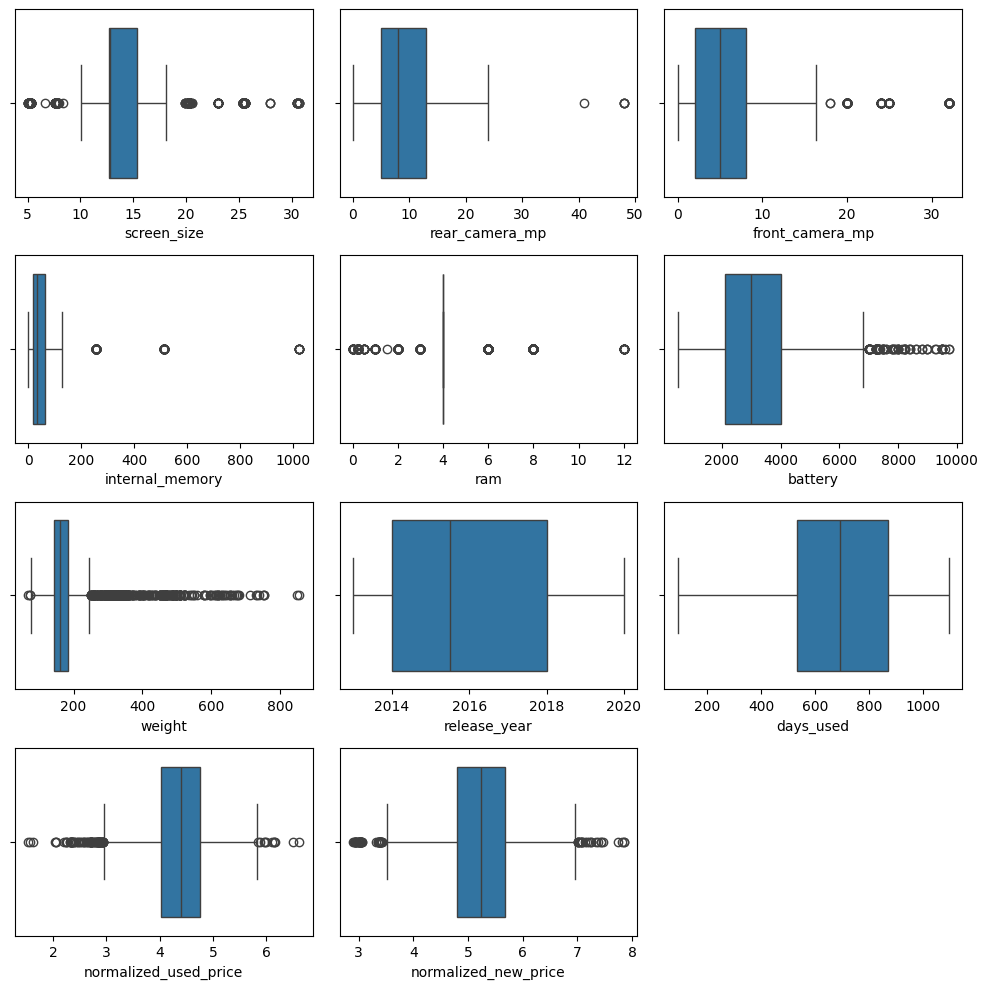

In [19]:
fig = plt.figure(figsize=(10,10))
num_cols = df_new2.select_dtypes(include='number').columns   # numerical columns

for i in range(len(num_cols)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df_new2, x=df_new2[num_cols[i]])

plt.tight_layout()
plt.show()

#### Distribution plots

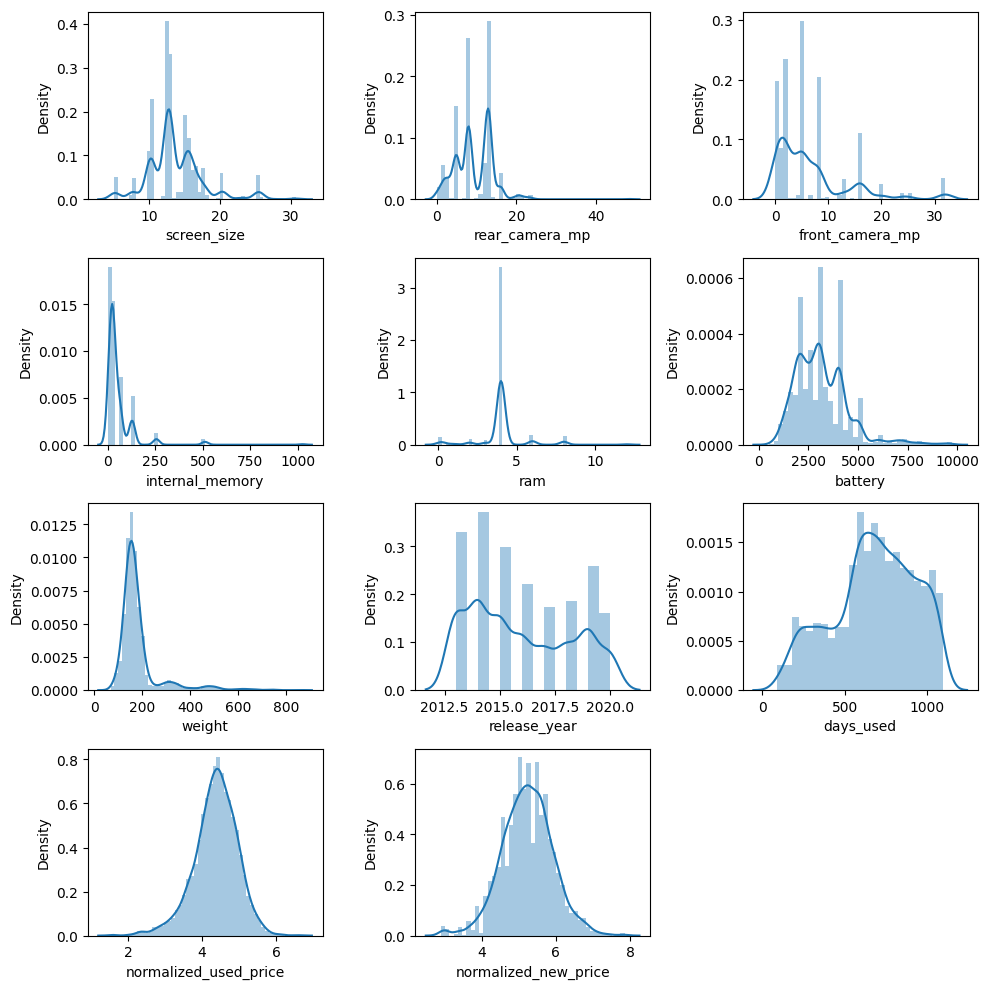

In [20]:
fig = plt.figure(figsize=(10,10))
num_cols = df_new2.select_dtypes(include='number').columns   # numerical columns

for i in range(len(num_cols)):
    plt.subplot(4,3,i+1)
    sns.distplot(df_new2[num_cols[i]])

plt.tight_layout()
plt.show()

#### Heat map

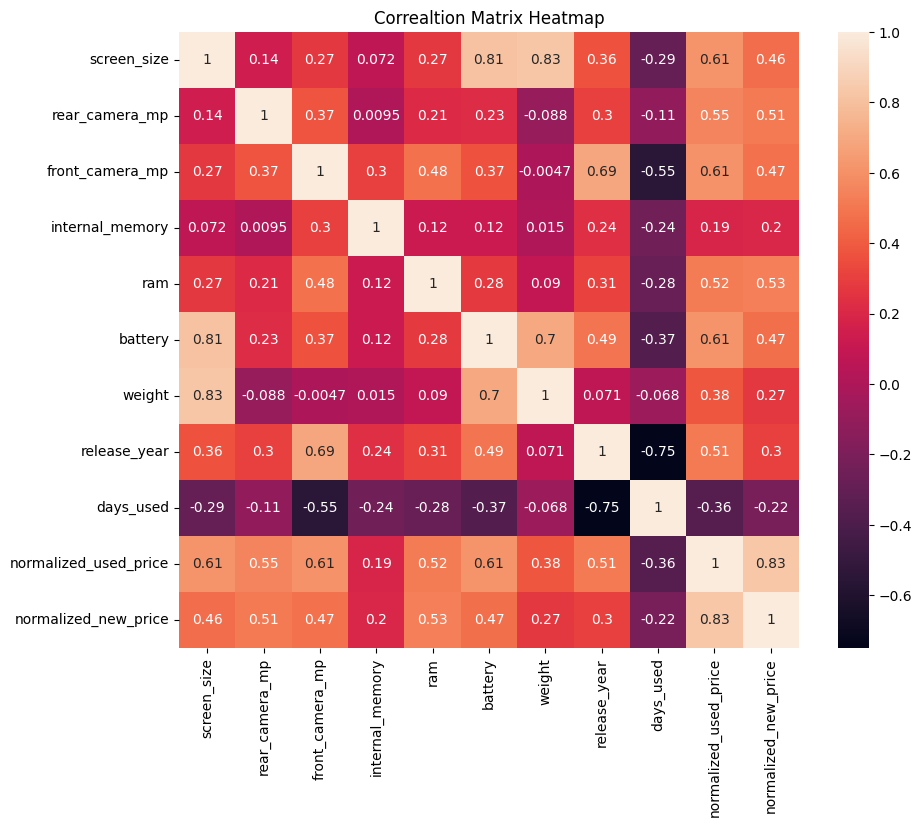

In [21]:
plt.figure(figsize=(10,8))
correlation_matrix = df_new2[num_cols].corr()
sns.heatmap(correlation_matrix, annot= True)
plt.title("Correaltion Matrix Heatmap")
plt.show()

#### Count plots

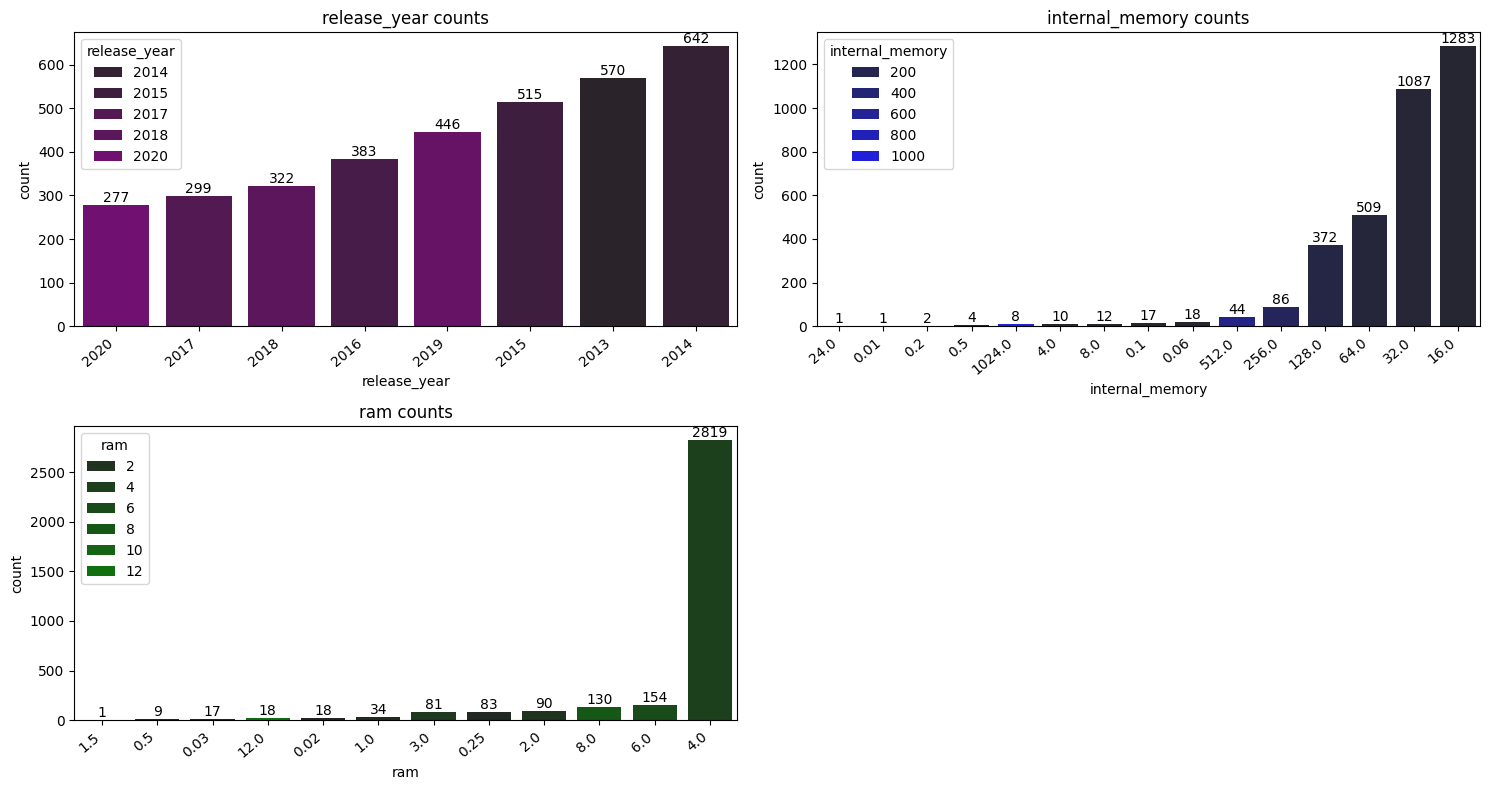

In [22]:
fig = plt.figure(figsize=(15,8))
cols = ['release_year','internal_memory','ram']   # numerical columns
colorL = ['purple','blue','green']

for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=cols[i], data=df_new2, hue=cols[i], dodge=False,
                   order=df_new2[cols[i]].value_counts().sort_values().index, color=colorL[i], width=0.8)
    for c in ax.containers:
        ax.bar_label(c)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    plt.title(str(cols[i])+" counts")

plt.tight_layout()
plt.show()

#### Scatter Plots

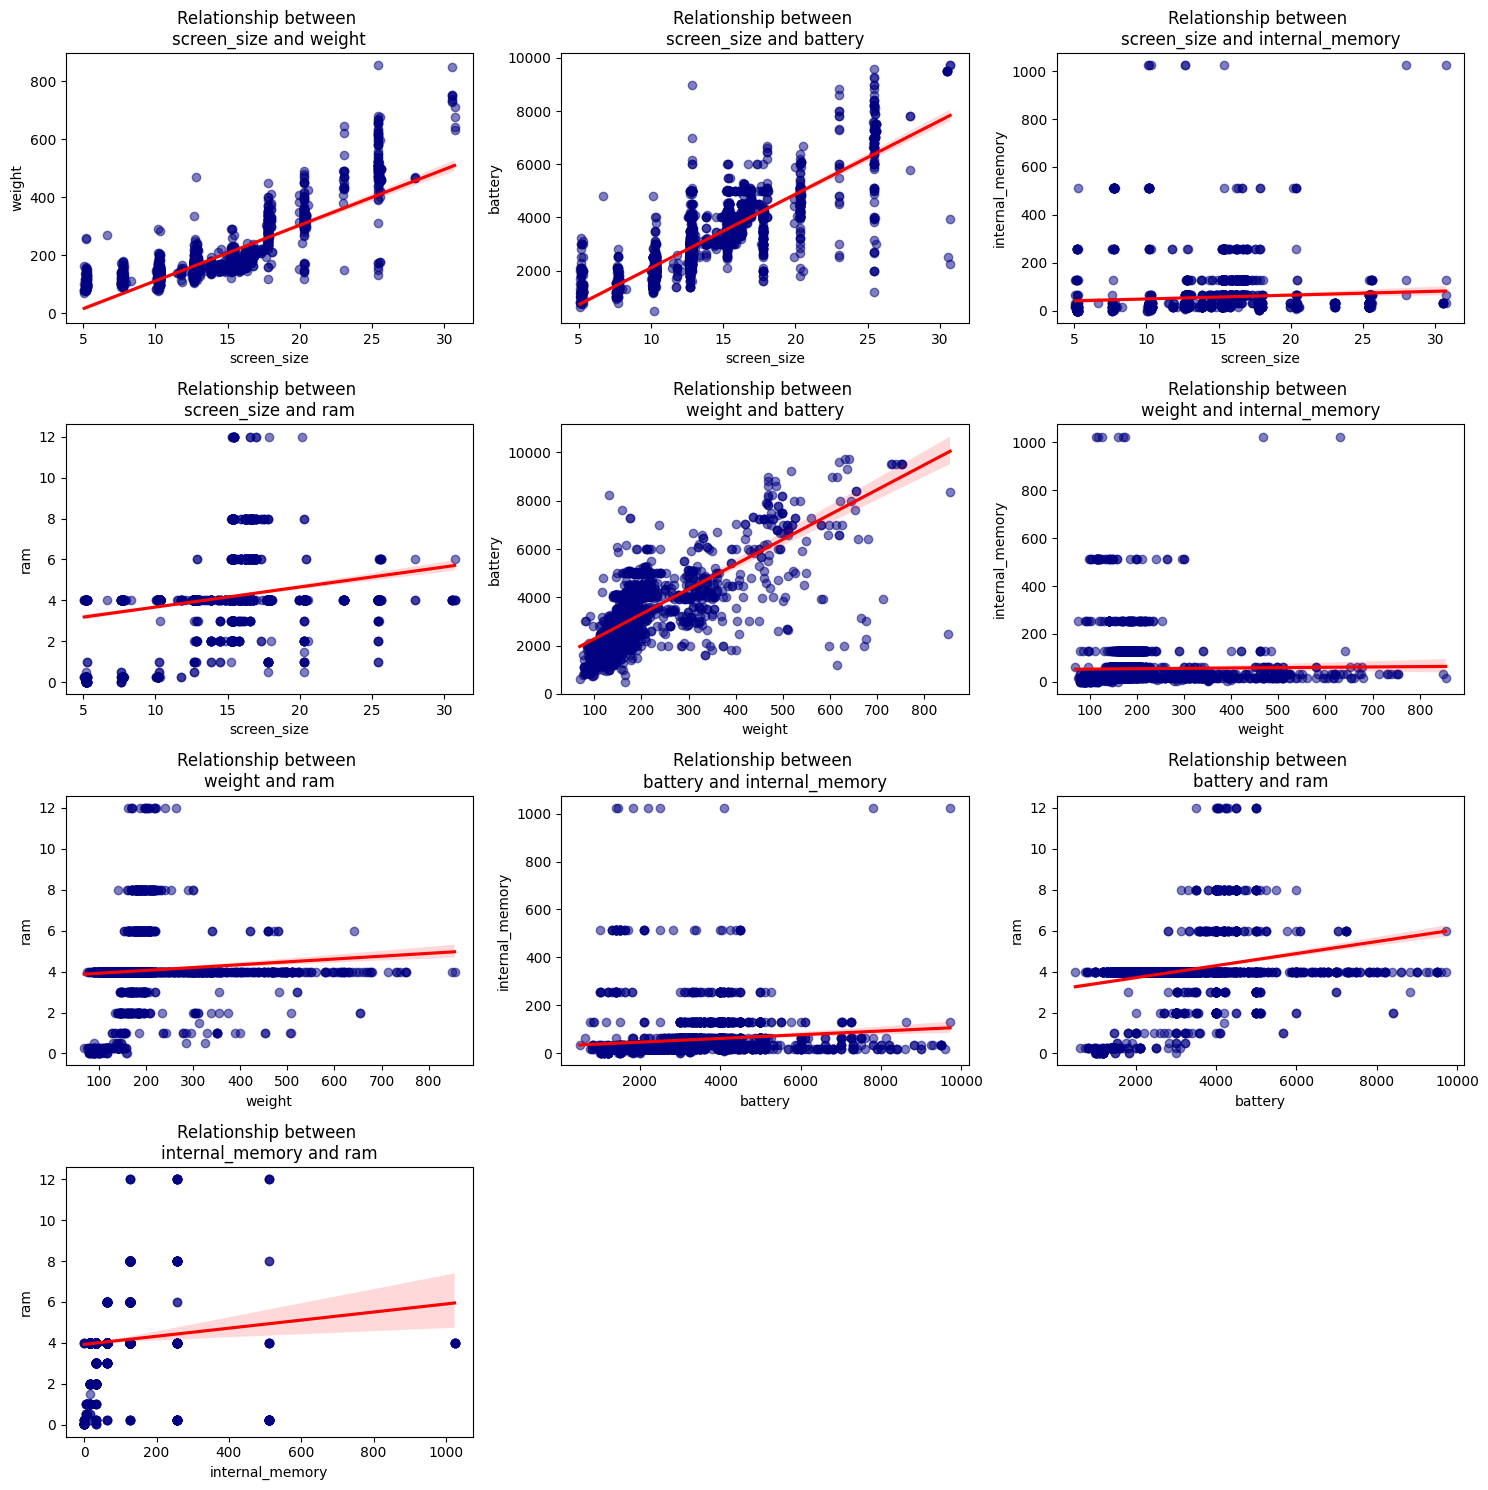

In [23]:
cols = ['screen_size','weight','battery','internal_memory','ram']
df_num = df_new2[cols]
plt.figure(figsize=(15,15))

subplot_idx = 1
for i in range(4):
    for j in range(i+1, 5):
        plt.subplot(4,3,subplot_idx)
        sns.regplot(x = cols[i], y = cols[j], data = df_num, scatter_kws = {"color": "navy", "alpha": 0.5},
            line_kws = {"color": "red"})
        plt.title(f'Relationship between \n{cols[i]} and {cols[j]}')
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        subplot_idx += 1

plt.tight_layout()
plt.show()

# Feature Engineering

#### Dealing with outliers

In [24]:
# Considering minimum and maximum values in each column and checking whether those data really exists.
# If not, there are outliers in those features and can be replaced or trimmed.


In [25]:
# screen size

min_value1 = df_new2['screen_size'].min()
min_row1 = df_new2[df_new2['screen_size'] == min_value1]
max_value1 = df_new2['screen_size'].max()
max_row1 = df_new2[df_new2['screen_size'] == max_value1]
pd.concat([min_row1, max_row1], axis=0)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
884,Others,Others,5.08,no,no,1.3,0.3,128.0,0.25,820.0,80.0,2013,905,2.212660,3.041184
885,Others,Others,5.08,no,no,0.3,0.3,32.0,0.25,820.0,80.0,2013,636,1.536867,3.042139
898,Others,Others,5.08,no,no,1.3,0.3,64.0,0.25,620.0,69.0,2013,990,2.236445,3.007167
934,Others,Others,5.08,no,no,2.0,2.0,24.0,4.00,1000.0,101.0,2015,691,3.151453,4.948263
938,Others,Others,5.08,no,no,2.0,0.3,16.0,4.00,1300.0,161.0,2013,630,3.193763,4.940785
2533,Samsung,Others,5.08,no,no,8.0,2.0,16.0,4.00,800.0,75.0,2014,990,2.052841,3.057298
388,Apple,Others,30.71,yes,no,12.0,7.0,128.0,6.00,9720.0,641.0,2020,220,5.847392,6.907335
644,Apple,iOS,30.71,yes,no,12.0,7.0,1024.0,4.00,9720.0,631.0,2018,543,5.808022,7.003847
653,Apple,iOS,30.71,yes,no,12.0,7.0,64.0,4.00,2256.0,677.0,2017,541,5.759186,6.803095
662,Apple,iOS,30.71,yes,no,8.0,1.2,32.0,4.00,3937.0,713.0,2015,572,5.558872,6.744671


In [26]:
# rear_camera_mp

min_value1 = df_new2['rear_camera_mp'].min()
min_row1 = df_new2[df_new2['rear_camera_mp'] == min_value1]
max_value1 = df_new2['rear_camera_mp'].max()
max_row1 = df_new2[df_new2['rear_camera_mp'] == max_value1]
pd.concat([min_row1, max_row1], axis=0)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
618,Others,Others,5.18,no,no,0.08,2.0,16.0,4.0,1000.0,80.0,2014,1008,2.630449,2.942331
210,ZTE,Android,16.89,yes,no,48.00,16.0,128.0,8.0,5000.0,215.0,2019,336,5.668052,6.708780
215,ZTE,Android,16.89,yes,no,48.00,16.0,64.0,6.0,5000.0,215.0,2019,506,5.263726,6.217723
3240,Motorola,Android,15.34,yes,no,48.00,25.0,128.0,4.0,3600.0,165.0,2019,371,5.325933,5.541224
3381,Motorola,Android,15.34,yes,no,48.00,25.0,128.0,4.0,3600.0,165.0,2019,422,5.331027,5.541224


In [27]:
# front_camera_mp

min_value1 = df_new2['front_camera_mp'].min()
min_row1 = df_new2[df_new2['front_camera_mp'] == min_value1]
max_value1 = df_new2['front_camera_mp'].max()
max_row1 = df_new2[df_new2['front_camera_mp'] == max_value1]
pd.concat([min_row1, max_row1], axis=0)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
113,Nokia,Others,5.18,no,no,0.3,0.0,0.10,0.03,1020.0,90.5,2020,272,2.910174,3.399863
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,4.00,1020.0,91.3,2020,288,2.729159,2.911263
116,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,1200.0,88.2,2020,266,3.370738,3.699077
117,Nokia,Others,5.18,yes,no,0.3,0.0,32.00,0.02,1200.0,86.5,2019,234,2.721295,3.688379
332,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.03,1020.0,90.5,2020,322,2.519308,3.386422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,Samsung,Android,15.42,yes,no,8.0,32.0,128.00,6.00,4500.0,186.0,2020,213,5.199546,5.946624
3431,Samsung,Android,15.42,yes,no,12.0,32.0,128.00,6.00,4500.0,179.0,2019,202,5.302011,5.633539
3432,Samsung,Android,15.37,yes,no,12.0,32.0,64.00,4.00,4000.0,172.0,2019,382,5.069219,5.405781
3437,Samsung,Android,15.42,yes,yes,12.0,32.0,128.00,6.00,4500.0,206.0,2019,254,5.572306,6.742373


In [28]:
# internal_memory

min_value1 = df_new2['internal_memory'].min()
min_row1 = df_new2[df_new2['internal_memory'] == min_value1]
max_value1 = df_new2['internal_memory'].max()
max_row1 = df_new2[df_new2['internal_memory'] == max_value1]
pd.concat([min_row1, max_row1], axis=0)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1436,Karbonn,Android,10.16,no,no,5.00,0.3,0.01,0.25,1450.0,114.5,2013,778,3.097386,4.379899
644,Apple,iOS,30.71,yes,no,12.00,7.0,1024.00,4.00,9720.0,631.0,2018,543,5.808022,7.003847
645,Apple,iOS,27.94,yes,no,12.00,7.0,1024.00,4.00,7812.0,468.0,2018,525,6.158969,6.778899
772,Asus,Android,12.70,no,no,8.00,0.3,1024.00,4.00,2500.0,160.0,2014,860,3.523120,4.594413
791,Asus,Android,10.34,no,no,13.00,1.2,1024.00,4.00,1820.0,126.0,2014,772,5.494953,5.555012
1468,Lava,Android,10.16,no,no,2.00,0.3,1024.00,4.00,1400.0,113.0,2013,595,2.978077,3.934958
1940,Micromax,Android,10.08,no,no,3.15,0.3,1024.00,4.00,1450.0,118.0,2013,836,3.437208,4.503912
2251,Others,Android,12.70,no,no,5.00,0.3,1024.00,4.00,2200.0,170.0,2013,584,4.070905,5.135798
2355,Samsung,Android,15.34,yes,no,12.00,9.0,1024.00,4.00,4100.0,175.0,2019,291,5.569718,6.957269


In [29]:
# ram

min_value1 = df_new2['ram'].min()
min_row1 = df_new2[df_new2['ram'] == min_value1]
max_value1 = df_new2['ram'].max()
max_row1 = df_new2[df_new2['ram'] == max_value1]
pd.concat([min_row1, max_row1], axis=0)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
116,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.02,1200.0,88.2,2020,266,3.370738,3.699077
117,Nokia,Others,5.18,yes,no,0.30,0.0,32.00,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2044,Nokia,Others,5.18,yes,no,2.00,0.0,0.10,0.02,1100.0,117.0,2018,417,3.916015,4.505681
2049,Nokia,Others,5.18,yes,no,2.00,0.0,0.06,0.02,1200.0,88.1,2018,582,3.559909,4.611252
2052,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1200.0,88.2,2017,680,3.602504,4.256747
2057,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1000.0,160.0,2017,554,3.772761,4.098669
2058,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.02,3000.0,81.0,2016,815,2.718660,3.374511
2060,Nokia,Others,5.28,no,no,2.00,0.0,0.06,0.02,1200.0,91.8,2015,867,2.934920,4.219655
2062,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1100.0,79.0,2015,1012,3.199897,3.735763
2064,Nokia,Others,5.18,no,no,0.30,0.0,32.00,0.02,1100.0,78.4,2015,559,2.587012,3.378611


In [30]:
# battery

min_value1 = df_new2['battery'].min()
min_row1 = df_new2[df_new2['battery'] == min_value1]
max_value1 = df_new2['battery'].max()
max_row1 = df_new2[df_new2['battery'] == max_value1]
pd.concat([min_row1, max_row1], axis=0)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3064,ZTE,Android,10.19,yes,no,5.0,8.0,32.0,4.0,500.0,165.0,2019,383,4.798597,6.108825
388,Apple,Others,30.71,yes,no,12.0,7.0,128.0,6.0,9720.0,641.0,2020,220,5.847392,6.907335
644,Apple,iOS,30.71,yes,no,12.0,7.0,1024.0,4.0,9720.0,631.0,2018,543,5.808022,7.003847


In [31]:
# weight

min_value1 = df_new2['weight'].min()
min_row1 = df_new2[df_new2['weight'] == min_value1]
max_value1 = df_new2['weight'].max()
max_row1 = df_new2[df_new2['weight'] == max_value1]
pd.concat([min_row1, max_row1], axis=0)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
898,Others,Others,5.08,no,no,1.3,0.3,64.0,0.25,620.0,69.0,2013,990,2.236445,3.007167
1142,Others,Android,25.43,no,no,5.0,2.0,16.0,4.00,8380.0,855.0,2015,889,5.163585,5.480264


In [32]:
# By checking data, decided to consider outliers of
# internal memory - upper limit ( can exist minimum value 0.01 Gb)
# battery - both upper and lower limits
# weight - upper limit (can exist minimum value 69 g)

In [33]:
'''# Trimming outliers

df_new3 = df_new2.copy()
def trim_outliers(col_name, upper, lower):
    upper_limit = df_new3[col_name].quantile(upper)
    lower_limit = df_new3[col_name].quantile(lower)
    df_new3 = df_new3[(df_new3[col_name] <= upper_limit) & (df_new3[col_name] >= lower_limit)]
    '''

'# Trimming outliers\n\ndf_new3 = df_new2.copy()\ndef trim_outliers(col_name, upper, lower):\n    upper_limit = df_new3[col_name].quantile(upper)\n    lower_limit = df_new3[col_name].quantile(lower)\n    df_new3 = df_new3[(df_new3[col_name] <= upper_limit) & (df_new3[col_name] >= lower_limit)]\n    '

In [34]:
# capping outliers - to prevent losing data

df_new4 = df_new2.copy()
def cap_outliers1(col_name, upper, lower):
    upper_limit = df_new4[col_name].quantile(upper)
    lower_limit = df_new4[col_name].quantile(lower)
    df_new4[col_name] = np.where(df_new4[col_name] >= upper_limit, upper_limit,
        np.where(df_new4[col_name] <= lower_limit, lower_limit, df_new4[col_name]))

def cap_outliers2(col_name, upper, lower):
    upper_limit = df_new4[col_name].quantile(upper)
    lower_limit = df_new4[col_name].quantile(lower)
    df_new4[col_name] = np.where(df_new4[col_name] >= upper_limit, upper_limit, df_new4[col_name])

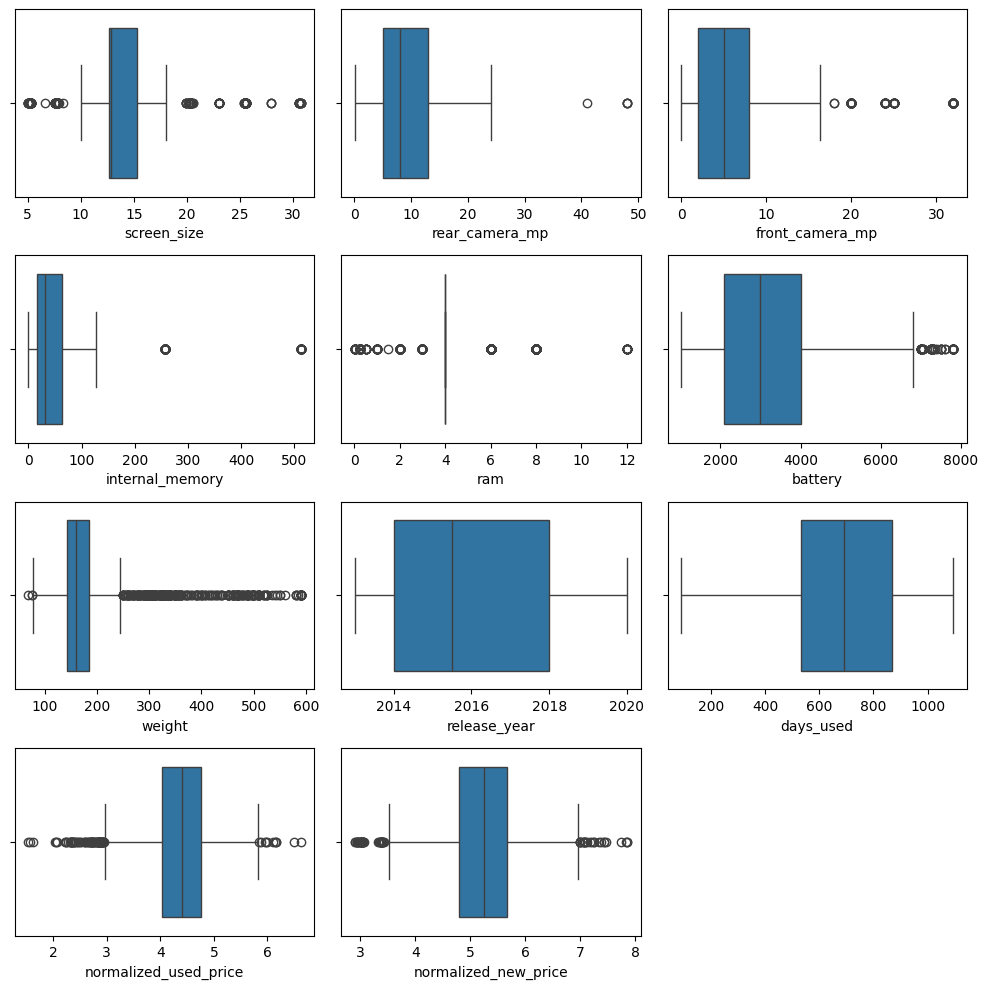

In [35]:

cap_outliers1("battery", 0.99, 0.01)
cap_outliers2("internal_memory", 0.99, 0.01)
cap_outliers2("weight", 0.99, 0.01)

fig = plt.figure(figsize=(10,10))
num_cols = df_new4.select_dtypes(include='number').columns   # numerical columns

for i in range(len(num_cols)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df_new4, x=df_new4[num_cols[i]])

plt.tight_layout()
plt.show()

#### Categorical columns to numerical columns

In [36]:
# One-Hot encoding
categorical_col = df_new4.select_dtypes(include='object').columns
encoded_data = pd.get_dummies(df_new4,columns=categorical_col, dtype=int)

## Normalizing data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = encoded_data.drop('normalized_used_price',axis=1)
y = encoded_data['normalized_used_price'] # dependent (target) variale

# Normalizing the data
scaler = StandardScaler()
normalized_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.2, random_state = 42)


## Fitting the machine learning model

### Neural Network

### Importing necessary libraries

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *  # Configuring the optimizer
from keras.losses import binary_crossentropy # Using binary cross entropy
from keras.metrics import binary_accuracy
from scipy.stats import randint, uniform

### Build a DNN model

In [39]:
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

### Compile and fit the model

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss = 'mean_squared_error',
              metrics=['mae'])

In [41]:
history = model.fit(X_train, y_train,
                   epochs=30,
                   batch_size=200,
                   validation_data=(X_test, y_test))

Epoch 1/30
14/14 [==============================] - 1s 20ms/step - loss: 19.2069 - mae: 4.3414 - val_loss: 19.2407 - val_mae: 4.3482
Epoch 2/30
14/14 [==============================] - 0s 5ms/step - loss: 19.0167 - mae: 4.3189 - val_loss: 19.0458 - val_mae: 4.3250
Epoch 3/30
14/14 [==============================] - 0s 6ms/step - loss: 18.8051 - mae: 4.2934 - val_loss: 18.8255 - val_mae: 4.2985
Epoch 4/30
14/14 [==============================] - 0s 7ms/step - loss: 18.5616 - mae: 4.2638 - val_loss: 18.5694 - val_mae: 4.2672
Epoch 5/30
14/14 [==============================] - 0s 5ms/step - loss: 18.2772 - mae: 4.2287 - val_loss: 18.2662 - val_mae: 4.2296
Epoch 6/30
14/14 [==============================] - 0s 6ms/step - loss: 17.9344 - mae: 4.1856 - val_loss: 17.9026 - val_mae: 4.1834
Epoch 7/30
14/14 [==============================] - 0s 6ms/step - loss: 17.5219 - mae: 4.1323 - val_loss: 17.4603 - val_mae: 4.1257
Epoch 8/30
14/14 [==============================] - 0s 5ms/step - loss: 17.

### Plotting the MAE with respect to epochs

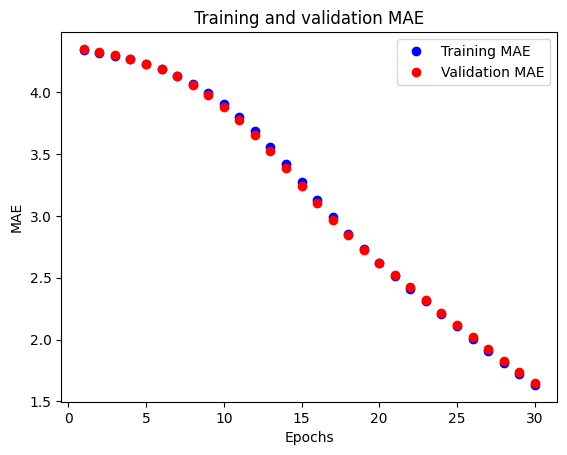

In [46]:
history_dict = history.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values)+1)
plt.plot(epochs, mae_values, 'bo', label='Training MAE')
plt.plot(epochs, val_mae_values, 'ro', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('fig.png')
plt.show()

### Make predictions

In [43]:
from sklearn.metrics import  r2_score, mean_squared_error

DNN_pred = model.predict(X_test)
print("R2 score: ", r2_score(DNN_pred, y_test))
print("MSE: ", mean_squared_error(DNN_pred, y_test))

22/22 [==============================] - 0s 2ms/step
R2 score:  -1.1384987641939643
MSE:  4.536784113943461


In [44]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(52, 3) dtype=float32, numpy=
 array([[-0.18249519,  0.30312237, -0.07604609],
        [ 0.02291209,  0.06373155, -0.08778132],
        [-0.35524514, -0.2398031 , -0.17036445],
        [-0.16586997, -0.49982685, -0.01374017],
        [-0.17486438, -0.5445843 , -0.19891381],
        [-0.48977593, -0.24789898,  0.1083188 ],
        [ 0.28737226, -0.01159383, -0.22950584],
        [-0.10753267, -0.00781091,  0.13147615],
        [ 0.52855027,  0.36212012,  0.12147958],
        [-0.23469262,  0.3136165 ,  0.08181757],
        [ 0.0994863 ,  0.10633929,  0.11825013],
        [-0.05303494,  0.07836615, -0.02151598],
        [-0.722395  , -0.41424325,  0.34586018],
        [-0.17863424,  0.2039556 ,  0.14551677],
        [ 0.56387913, -0.7843963 ,  0.06311087],
        [ 0.05111106, -0.76876813,  0.01203821],
        [ 0.09581126,  0.11287737,  0.04562918],
        [-0.68938476,  0.12351839,  0.06829587],
        [-0.65986764,  0.14896412,  0.05214802],
  

# Hyperparameter Tuning

## 1) Automative hyperparameter tuning method

### i) Function to create a Keras model for use in scikit-learn's RandomizedSearchCV

In [72]:
def create_model(optimizer='adam', activation='relu', neurons=64, dropout_rate=0.0):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

### ii) Create a KerasRegressor

In [75]:
from scikeras.wrappers import KerasRegressor

model = KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=0, activation='relu', dropout_rate=0.0, neurons=126)

### iii) Define the hyperparameter distributions

In [76]:
param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': randint(32, 128),
    'dropout_rate': uniform(0.0, 0.5)
}

### iv) Perform randomized search using cross-validation

In [77]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_result = random_search.fit(X_train, y_train)

### v) Print the best parameters and corresponding accuracy

In [78]:
print("Best Parameters: ", random_result.best_params_)
print("Best Accuracy: {:.2f}%".format(random_result.best_score_ * 100))

Best Parameters:  {'activation': 'relu', 'dropout_rate': 0.2683293107748112, 'neurons': 104, 'optimizer': 'rmsprop'}
Best Accuracy: 80.43%


### Use the best parameters obtained from hyperparameter tuning

In [79]:
best_params = random_result.best_params_
optimized_model = create_model(**best_params)

### Train the optimized model on the entire training set

In [80]:
optimized_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

### Make predictions on the test set

In [2]:
predictions = optimized_model.predict(X_test)
print("Best model R2 Score: ", r2_score(predictions, y_test))
print("Best model MSE: ", mean_squared_error(predictions, y_test))

NameError: name 'optimized_model' is not defined

## 2) Manual hyperparameter tuning method

In [67]:
import tkinter as tk
from tkinter.ttk import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# defind a function for the plot button to plot the graphs
def plot():
    ax.clear() # clear the canvas
    global history

    history_dict = history.history
    mae_values = history_dict['mae']
    val_mae_values = history_dict['val_mae']
    epochs = range(1, len(mae_values)+1)
    plt.plot(epochs, mae_values, 'bo-', label='Training MAE')
    plt.plot(epochs, val_mae_values, 'ro-', label='Validation MAE') # plot the graph on the canvas
    ax.set_title('Training and validation MAE')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('MAE')
    ax.legend()
    canvas.draw()

# defind a function for the clear button to clear whole things
def clear():
    ax.clear()
    ax.set_title('Training and validation MAE')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('MAE')
    canvas.draw()
    label6.config(text=" ", anchor="center", bg="#caebde")
    combo3.current(1)
    combo1.current(2)
    spin2.delete(0, END)
    spin2.insert(0, "0")
    spin0.delete(0, END)
    spin0.insert(0, "0")


def enter():
    global layer, layers
    layers = [i for i in range(int(spin0.get()))]
    layer = 0
    label6.config(text="Layer 1", anchor="center", bg="#caebde")

def next_layer():
    global layer, layers
    if (layer < len(layers)):
        layers[layer] = [int(combo0.get()), str(combo5.get())]
        layer += 1

        if layer != len(layers):
            label6.config(text="Layer "+str(layer+1), anchor="center", bg="#caebde")

    combo0.current(0)
    combo5.current(0)

# defind a function for the save button to save the plot
def save():
    #r = entry0.get()
    #if(r != ""):
        #plt.savefig(f'Logistic_Map_r_{r}.PNG')
    #else:
        return

def train():
    global history

    model = Sequential()
    model.add(Dense(3, activation='relu', input_shape=(X_train.shape[1],)))

    for i in range(len(layers)):
        model.add(Dense(layers[i][0], activation=layers[i][1]))

    model.add(Dense(1))

    model.compile(optimizer=str(combo1.get()),
                               loss = 'mse',
                               metrics=['mae'])
    history = model.fit(X_train, y_train,
                   epochs=int(spin2.get()),
                   batch_size=int(combo3.get()),
                   validation_data=(X_test, y_test))

    model.summary()

    return

# Create the main application window
root = tk.Tk()
root.resizable(False, False)
root.title("Training and validation MAE")

fig, ax = plt.subplots()
ax.set_title("Training and validation MAE")
ax.set_xlabel('Epochs')
ax.set_ylabel('MAE')

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(row=0,column=0,columnspan=4)

# Create label widgets
label0 = tk.Label(root, text="Number of Hidden Layers :", bg="#caebde")
label0.grid(row=1,column=0, sticky="nsew")
label1 = tk.Label(root, text="Optimizer :", bg="#caebde")
label1.grid(row=2,column=0, sticky="nsew")
label2 = tk.Label(root, text="Epochs :", bg="#caebde")
label2.grid(row=3,column=0, sticky="nsew")
label3 = tk.Label(root, text="Batch Size :", bg="#caebde")
label3.grid(row=4,column=0, sticky="nsew")
label4 = tk.Label(root, text="Neurons", anchor="center", bg="#caebde")
label4.grid(row=2,column=2, sticky="nsew")
label5 = tk.Label(root, text="Activation Function", anchor="center", bg="#caebde")
label5.grid(row=2,column=3, sticky="nsew")
label6 = tk.Label(root, text="", bg="#caebde")
label6.grid(row=1,column=3, sticky="nsew")

# Create an entry widget
# number of hidden layers
spin0 = Spinbox(from_=1, to=8)
spin0.insert(0, "0")
spin0.grid(row=1, column=1, sticky="nsew")

# optimizer
combo1 = Combobox()
combo1["values"] = ("SGD", "Adagrad", "RMSprop", "Adadelta", "Adam", "Adamax", "Nadam")
combo1.current(2)
combo1.grid(row=2, column=1, sticky="nsew")

# epochs
spin2 = Spinbox(from_=1, to=12)
spin2.insert(0, "0")
spin2.grid(row=3, column=1, sticky="nsew")

# batch size
combo3 = Combobox()
combo3["values"] = (20, 50, 100, 250, 500, 1000)
combo3.current(1)
combo3.grid(row=4, column=1, sticky="nsew")

# neurons
combo0 = Combobox()
combo0["values"] = (1, 2, 4, 8, 16 , 32, 64)
combo0.current(0)
combo0.grid(row=3, column=2, sticky="nsew")

# activation function
combo5 = Combobox()
combo5["values"] = ("relu", "tanh", "softmax", "sigmoid")
combo5.current(0)
combo5.grid(row=3, column=3, sticky="nsew")

# Create a button widget
enter_button = Button(root, text="Enter", command = enter)
enter_button.grid(row=1,column=2, sticky="nsew")
next_button = Button(root, text="Next Layer", command = next_layer)
next_button.grid(row=4,column=2,columnspan=2, sticky="nsew")
train_button = Button(root, text="Train", command = train)
train_button.grid(row=5,column=0, sticky="nsew")
plot_button = Button(root, text="Plot", command = plot)
plot_button.grid(row=5,column=1, sticky="nsew")
clear_button = Button(root, text="Clear", command = clear)
clear_button.grid(row=5,column=2, columnspan=2, sticky="nsew")
save_button = Button(root, text='Save', command = save)
save_button.grid(row=6,column=0, columnspan=4, sticky="nsew")

# Start the main event loop
root.mainloop()

TclError: no display name and no $DISPLAY environment variable